In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import re
import torch
from torch_geometric.data import Data
from torch_geometric.data import DataLoader
import os.path as osp
from dataset import  FalconDataset
import energyflow as ef

In [2]:
#f = open("rep_dim_8_nevents_64000_final.log", "r")
f = open("training.log", "r")
s = f.readlines()
f.close()

In [3]:
s

['INFO:root:Train Epoch: 1 [0/640000 (0%)]\tLoss: 1198.864624\n',
 'INFO:root:Train Epoch: 1 [1500/640000 (2%)]\tLoss: 681.236694\n',
 'INFO:root:Train Epoch: 1 [3000/640000 (5%)]\tLoss: 770.882690\n',
 'INFO:root:Train Epoch: 1 [4500/640000 (8%)]\tLoss: 1115.580933\n',
 'INFO:root:Train Epoch: 1 [6000/640000 (10%)]\tLoss: 1016.856201\n',
 'INFO:root:Train Epoch: 1 [7500/640000 (12%)]\tLoss: 528.159790\n',
 'INFO:root:Train Epoch: 1 [9000/640000 (15%)]\tLoss: 339.107147\n',
 'INFO:root:Train Epoch: 1 [10500/640000 (18%)]\tLoss: 774.942993\n',
 'INFO:root:Train Epoch: 1 [12000/640000 (20%)]\tLoss: 546.274475\n',
 'INFO:root:Train Epoch: 1 [13500/640000 (22%)]\tLoss: 761.973877\n',
 'INFO:root:Train Epoch: 1 [15000/640000 (25%)]\tLoss: 559.192017\n',
 'INFO:root:Train Epoch: 1 [16500/640000 (28%)]\tLoss: 608.295349\n',
 'INFO:root:Train Epoch: 1 [18000/640000 (30%)]\tLoss: 3137.098145\n',
 'INFO:root:Train Epoch: 1 [19500/640000 (32%)]\tLoss: 929.939514\n',
 'INFO:root:Train Epoch: 1 [21

In [4]:
sn = np.array(s)
s_mask = np.array(['Batch loss' in line for line in s])

In [5]:
loss = sn[s_mask]


In [6]:
loss_n = [ re.search('Batch loss:(.*)\n',line).group(1) for line in loss]
loss_array = np.array(loss_n, dtype='float32')

In [7]:
loss_array.shape

(480,)

In [8]:
loss_array

array([595.50543, 499.4207 , 476.51776, 464.33887, 456.10764, 449.2223 ,
       445.42627, 441.6424 , 439.33615, 437.52115, 436.82306, 436.31924,
       435.07843, 435.07446, 434.73694, 434.53848, 434.3075 , 434.14767,
       434.46448, 434.26474, 446.2591 , 430.73315, 423.46606, 419.17438,
       415.38022, 411.8979 , 410.84937, 409.07773, 408.21753, 407.40738,
       407.4017 , 407.13885, 406.46646, 406.59854, 406.48114, 406.19745,
       406.27686, 406.13858, 406.36337, 406.28394, 426.5322 , 413.03275,
       402.2466 , 395.45862, 388.91995, 384.83762, 382.60028, 380.09073,
       378.89157, 377.88412, 377.70435, 377.34265, 376.54507, 376.56985,
       376.40775, 376.13205, 376.21872, 376.0657 , 376.31543, 376.14713,
       392.74844, 376.61893, 363.91513, 357.04858, 352.54025, 348.62323,
       347.04776, 345.49823, 344.35504, 343.64618, 343.56018, 343.39444,
       342.80066, 342.75372, 342.57278, 342.47565, 342.47983, 342.39627,
       342.49524, 342.3799 , 359.7926 , 347.3697 , 

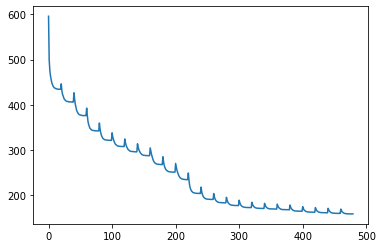

In [9]:
plt.plot(loss_array)

In [10]:
loss_array[-1]

159.22997

In [11]:
len(loss_array)

480

In [23]:
def preprocess_emd(torch_batch):
    batch_size = torch_batch.batch[-1] + 1
    ret = []
    for batch_idx in range(batch_size):
        ret.append(torch_batch.x[torch_batch.batch == batch_idx][:,:3].cpu().detach().numpy())
    return ret

In [24]:
batch_size = 32
device = torch.device('cuda:2')
kwargs = {'num_workers': 1, 'pin_memory': True}
dataset = FalconDataset('')[:64000]
test_loader = DataLoader(dataset,batch_size=batch_size, shuffle=True, drop_last=True, **kwargs)
it = iter(test_loader)

In [25]:
total = []

In [12]:
for _ in range(50):
    single = next(it)

    single

    a = preprocess_emd(single)
    target = ef.emd.emds(a, R=1.0)
    target
    total.append(np.unique(target.flatten()))

(array([7.39710524e-04, 2.51501578e-04, 3.55061051e-03, 8.55105365e-03,
        1.33887605e-02, 1.62884257e-02, 1.75903163e-02, 1.91732968e-02,
        2.06527178e-02, 2.05491583e-02, 2.09338078e-02, 2.06231294e-02,
        2.05639526e-02, 1.88182357e-02, 1.70429305e-02, 1.54303615e-02,
        1.56226863e-02, 1.37734100e-02, 1.31076705e-02, 1.09477158e-02,
        9.48308891e-03, 7.55984155e-03, 7.38231103e-03, 6.08042050e-03,
        5.60700577e-03, 4.76373577e-03, 4.76373577e-03, 4.51223419e-03,
        3.87608314e-03, 3.56540472e-03, 3.31390315e-03, 2.85528262e-03,
        3.07719578e-03, 2.70734052e-03, 2.02680683e-03, 1.49421526e-03,
        1.44983263e-03, 1.07997736e-03, 1.39065578e-03, 6.36151050e-04,
        5.76974208e-04, 3.40266841e-04, 3.40266841e-04, 3.99443683e-04,
        2.66295789e-04, 2.21913157e-04, 1.03559473e-04, 4.43826314e-05,
        8.87652628e-05, 2.95884209e-05]),
 array([  0.        ,   2.72008086,   5.44016171,   8.16024257,
         10.88032342,  13.6004

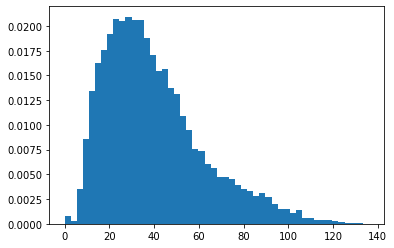

In [13]:
plt.hist(np.concatenate(total), bins=50,density=True)